In [6]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Uvelka/Data_fillna')

In [7]:
import pandas as pd
import numpy as np

# Загрузка данных

In [14]:
DATAPAH = '/content/drive/MyDrive/Colab Notebooks/Uvelka/Data/'

In [15]:
df = pd.read_csv(DATAPAH + 'data.csv', date_format = "%d/%m/%Y", parse_dates=['Дата/Время'], decimal = ',', dayfirst=True).iloc[:-1 , :]

In [16]:
df = df.copy()

In [17]:
df = df.drop(['Токовый ремни Афл3.4.Максим RMS', 'Токовый губки  Афл3.5.Максим RMS'], axis=1)

In [18]:
df.head()

,Дата/Время,Токовый ремни Афл3.1.Максим RMS,Токовый губки Афл3.1.Максим RMS,Токовый нипроллер Афл3.1.Максим RMS,Токовый губки Афл3.2.Максим RMS,Токовый нипроллер Афл3.2.Максим RMS,Токовый ремни Афл3.2.Максим RMS,Токовый ремни Афл3.3.Максим RMS,Токовый нипроллер Афл3.3.Максим RMS,Токовый губки Афл3.3.Максим RMS,Токовый губки Афл3.4.Максим RMS,Токовый нипроллер Афл3.4.Максим RMS,Токовый нипроллер Афл3.5.Максим RMS,Токовый ремни Афл3.5.Максим RMS
0,16.10.2024 0:00:00,16.6,9.9,1.6,11.3,0.1,0.0,15.6,0.2,6.8,17.3,2.6,3.2,13.4
1,16.10.2024 0:00:01,0.0,2.9,1.3,6.3,0.1,0.0,11.5,2.2,11.2,16.3,2.6,3.8,7.9
2,16.10.2024 0:00:02,0.0,7.0,0.0,7.8,0.1,0.0,6.3,2.0,11.9,11.7,2.8,1.6,10.8
3,16.10.2024 0:00:03,9.3,14.8,1.8,0.0,0.1,0.0,10.6,0.0,11.7,11.7,2.7,1.7,9.8
4,16.10.2024 0:00:04,9.2,8.2,0.0,13.9,0.1,0.0,9.6,2.5,8.8,11.7,2.6,3.3,13.7


# Использование интерполяции для заполнение пропусков в данных

In [20]:
df_filled_linear = df.interpolate(method='linear')

<ipython-input-20-27d498af7197>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled_linear = df.interpolate(method='linear')


In [21]:
df_filled_polynomial = df.interpolate(method='polynomial', order=2)

<ipython-input-21-4458b37051d7>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled_polynomial = df.interpolate(method='polynomial', order=2)


# Использование скользящего среднего для заполнение пропусков в данных

In [104]:
df_rolling_mean = df.fillna(df.iloc[:,1:].rolling(28, min_periods=1, center=True).mean())

In [105]:
df_rolling_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Дата/Время                            98 non-null     object 
 1   Токовый ремни Афл3.1.Максим RMS       98 non-null     float64
 2   Токовый губки  Афл3.1.Максим RMS      98 non-null     float64
 3   Токовый нипроллер  Афл3.1.Максим RMS  98 non-null     float64
 4   Токовый губки  Афл3.2.Максим RMS      98 non-null     float64
 5   Токовый нипроллер  Афл3.2.Максим RMS  98 non-null     float64
 6   Токовый ремни Афл3.2.Максим RMS       98 non-null     float64
 7   Токовый ремни Афл3.3.Максим RMS       98 non-null     float64
 8   Токовый нипроллер  Афл3.3.Максим RMS  98 non-null     float64
 9   Токовый губки  Афл3.3.Максим RMS      98 non-null     float64
 10  Токовый губки  Афл3.4.Максим RMS      98 non-null     float64
 11  Токовый нипроллер  Аф

Именно для параметра окна равнного 28 получается полность заполнить все пропуски.

Это первичные попытки заполнить пропуски, при более детальном заполнении пропусков, нужно для каждого ряда построить свои скользящие среднии с учетом среднего количества пропусков по этому ряду

# Визуализация

In [106]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set_theme(rc={'figure.figsize':(12,7)})

In [107]:
x = pd.to_datetime(df['Дата/Время'], dayfirst=True).dt.time.astype(str)

In [108]:
y1 = df_filled_linear['Токовый ремни Афл3.1.Максим RMS']
#y2 = df['Токовый ремни Афл3.2.Максим RMS']
y3 = df_filled_linear['Токовый ремни Афл3.3.Максим RMS']
##y4 = df['Токовый ремни Афл3.4.Максим RMS']
y5 = df_filled_linear['Токовый ремни Афл3.5.Максим RMS']

z1 = df_filled_polynomial['Токовый ремни Афл3.1.Максим RMS']
#y2 = df['Токовый ремни Афл3.2.Максим RMS']
z3 = df_filled_polynomial['Токовый ремни Афл3.3.Максим RMS']
##y4 = df['Токовый ремни Афл3.4.Максим RMS']
z5 = df_filled_polynomial['Токовый ремни Афл3.5.Максим RMS']

k1 = df_rolling_mean['Токовый ремни Афл3.1.Максим RMS']
#y2 = df['Токовый ремни Афл3.2.Максим RMS']
k3 = df_rolling_mean['Токовый ремни Афл3.3.Максим RMS']
##y4 = df['Токовый ремни Афл3.4.Максим RMS']
k5 = df_rolling_mean['Токовый ремни Афл3.5.Максим RMS']

<ipython-input-109-fd6f6736af94>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(x, rotation=90)
<ipython-input-109-fd6f6736af94>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(x, rotation=90)
<ipython-input-109-fd6f6736af94>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(x, rotation=90)


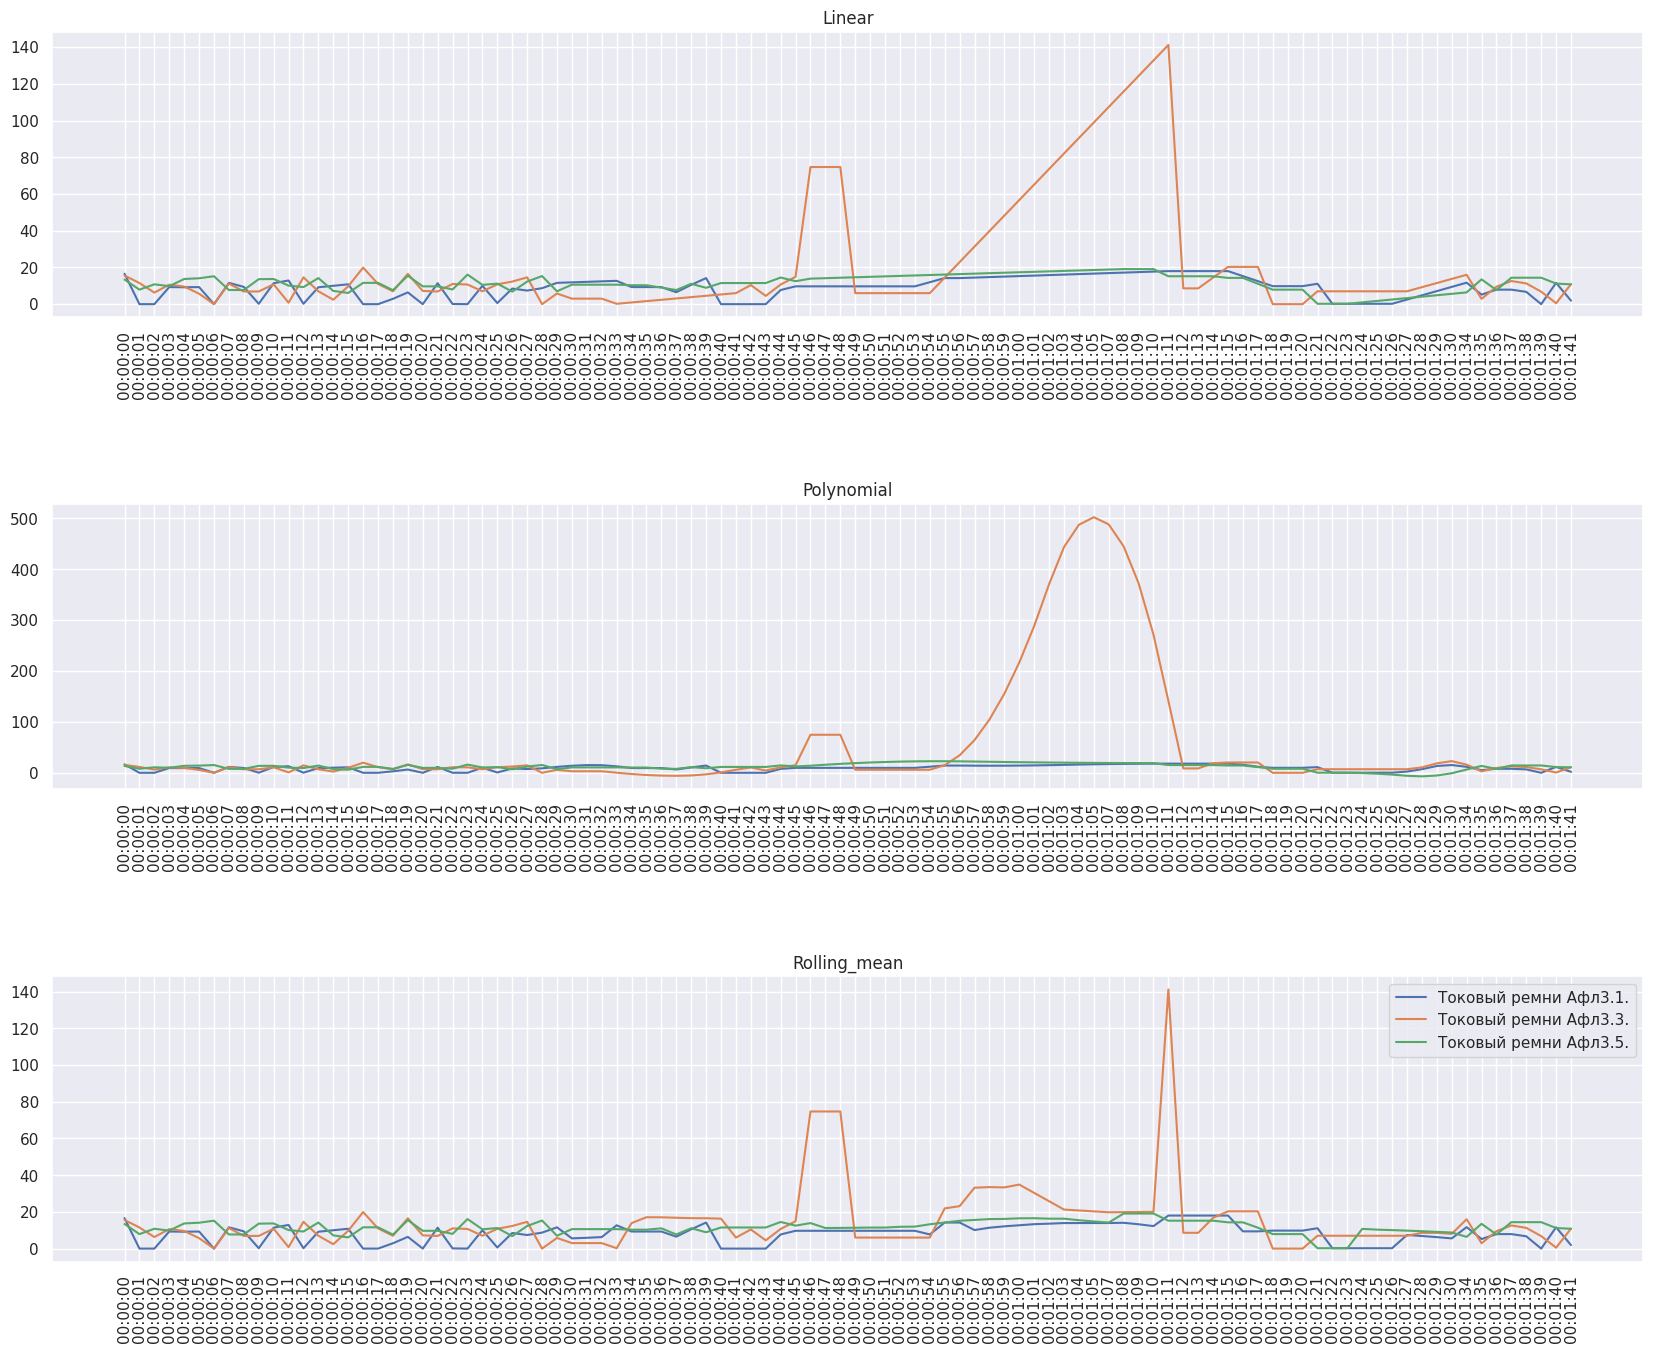

In [109]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))

axes[0].plot(x, y1, label="Токовый ремни Афл3.1.")
axes[0].plot(x, y3, label="Токовый ремни Афл3.3.")
axes[0].plot(x, y5, label="Токовый ремни Афл3.5.")
axes[0].set_title("Linear")
axes[0].set_xticklabels(x, rotation=90)

axes[1].plot(x, z1, label="Токовый ремни Афл3.1.")
axes[1].plot(x, z3, label="Токовый ремни Афл3.3.")
axes[1].plot(x, z5, label="Токовый ремни Афл3.5.")
axes[1].set_title(r"Polynomial")
axes[1].set_xticklabels(x, rotation=90)

axes[2].plot(x, k1, label="Токовый ремни Афл3.1.")
axes[2].plot(x, k3, label="Токовый ремни Афл3.3.")
axes[2].plot(x, k5, label="Токовый ремни Афл3.5.")
axes[2].set_title(r"Rolling_mean")
axes[2].set_xticklabels(x, rotation=90)

plt.tight_layout(pad=5.0)
plt.legend()
plt.show()

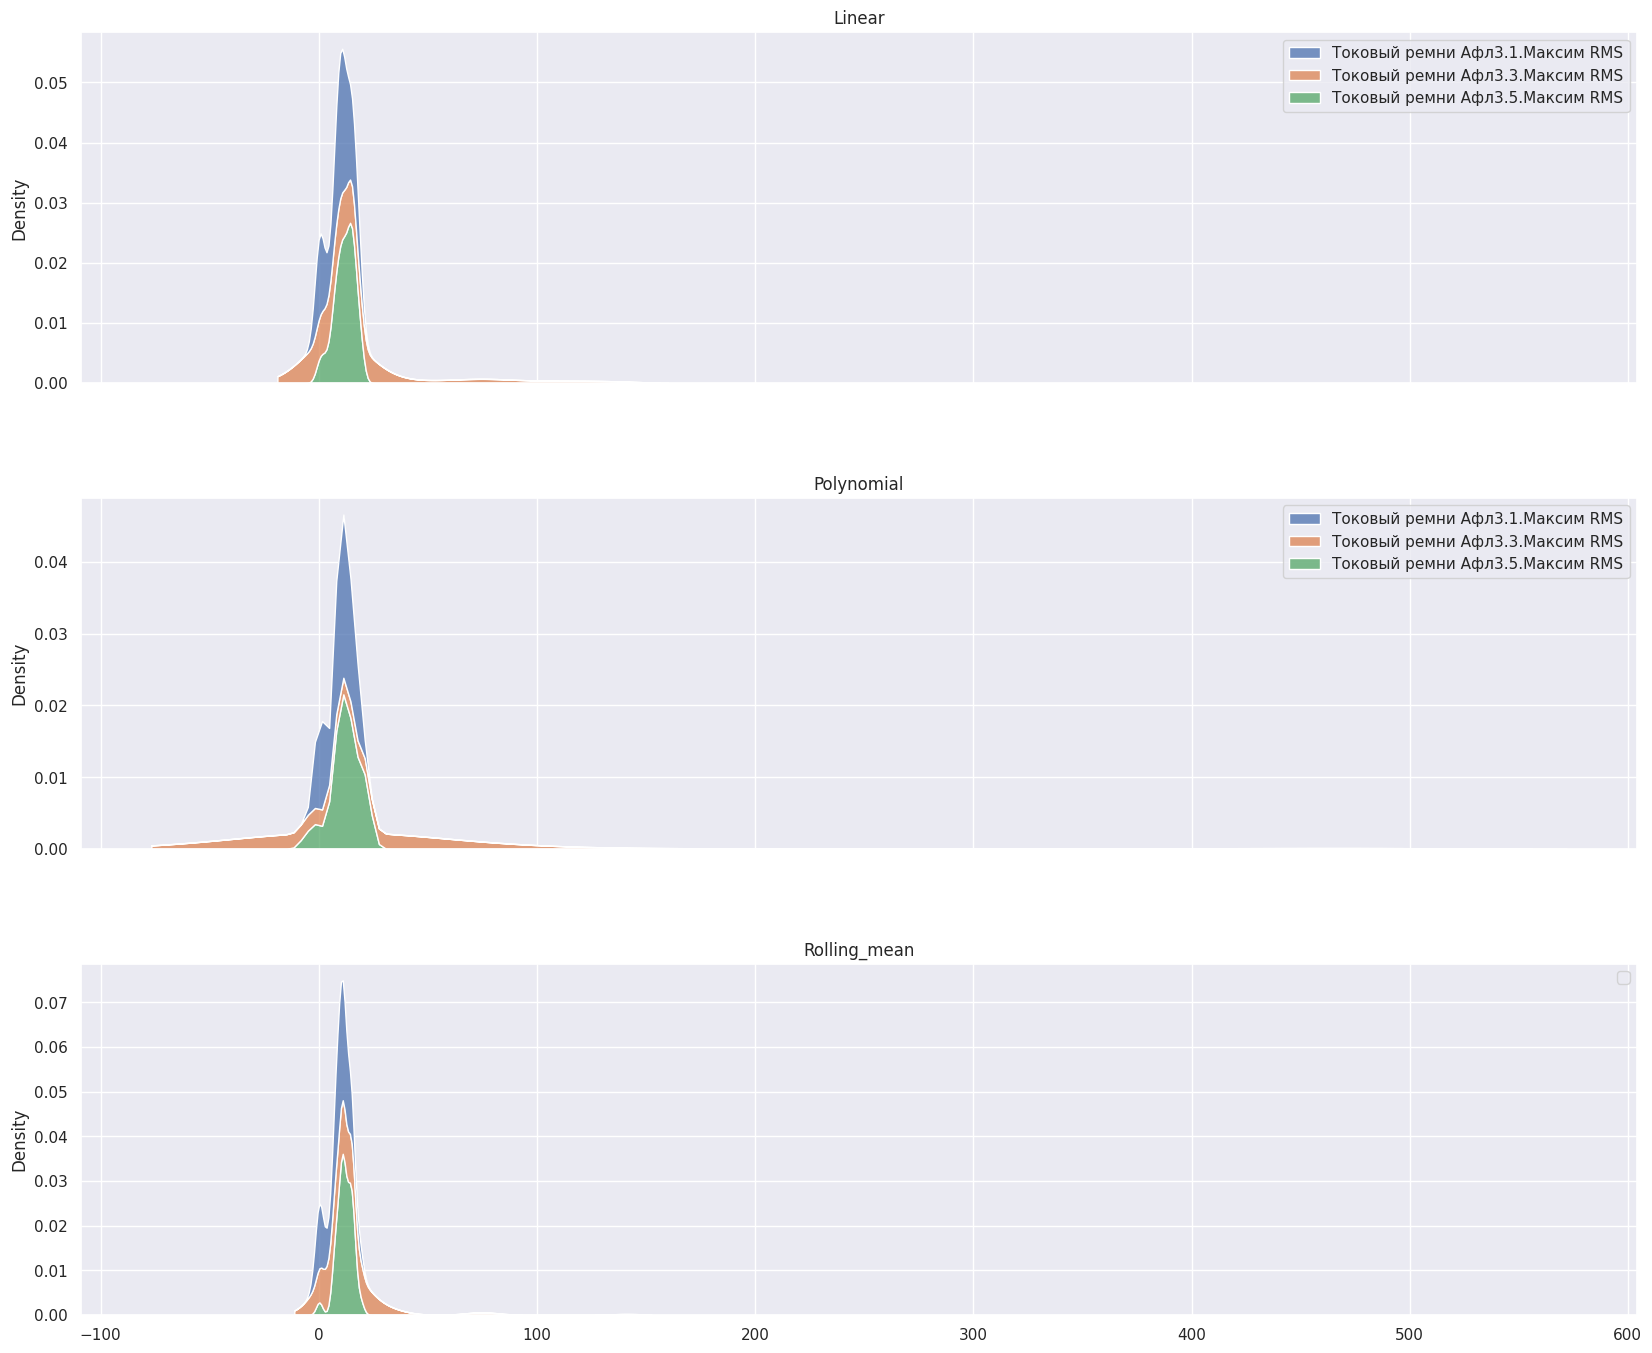

In [110]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 15), sharex=True)

sns.kdeplot(pd.concat([y1,y3,y5], axis =1), multiple="stack", ax=axes[0])
axes[0].set_title("Linear")

sns.kdeplot(pd.concat([z1,z3,z5], axis =1), multiple="stack", ax=axes[1])
axes[1].set_title(r"Polynomial")

sns.kdeplot(pd.concat([k1,k3,k5], axis =1), multiple="stack", ax=axes[2])
axes[2].set_title(r"Rolling_mean")

plt.tight_layout(pad=5.0)
plt.legend()
plt.show()

# Вывод

Лучше всего с заполнением пропусков справляется скользящее среднее, такой вывод сдлан наа основе визуальной составляющей и распределения значений датчиков.